<a href="https://colab.research.google.com/github/MichelWars/exercicios-de-aulas/blob/main/Aula_IA_12_05_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

import cv2                      # OpenCV: biblioteca principal de visão computacional
import matplotlib.pyplot as plt # Exibição de imagens com gráficos
import requests                 # Para baixar imagem da internet
import numpy as np              # Para trabalhar com arrays (imagem em bytes)



In [26]:

# URL da imagem
url = "https://wp-content.amenteemaravilhosa.com.br/2015/10/rostos-confianca.jpg"

# Baixa a imagem da internet
response = requests.get(url)

# Converte o conteúdo em array de bytes e decodifica como imagem colorida
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)



In [27]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



In [28]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")



In [29]:

faces = face_cascade.detectMultiScale(
    gray, scaleFactor=1.1, minNeighbors=5)



In [30]:

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)



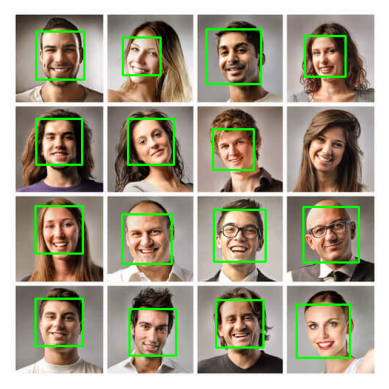

In [31]:

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Matplotlib usa RGB
plt.imshow(img_rgb)
plt.axis("off")
plt.show()



In [32]:

!pip install ultralytics



In [33]:

from PIL import Image                    # Trabalhar com imagens no formato PIL
import requests                          # Baixar imagem da internet
from io import BytesIO                   # Manipular dados em bytes
from ultralytics import YOLO             # Importar o modelo YOLOv8
import matplotlib.pyplot as plt          # Para exibir imagens



In [34]:

url = "https://wp-content.amenteemaravilhosa.com.br/2015/10/rostos-confianca.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))



In [35]:

model = YOLO("yolov8n.pt")


results = model(img)




0: 640x640 17 persons, 414.6ms
Speed: 15.6ms preprocess, 414.6ms inference, 25.9ms postprocess per image at shape (1, 3, 640, 640)


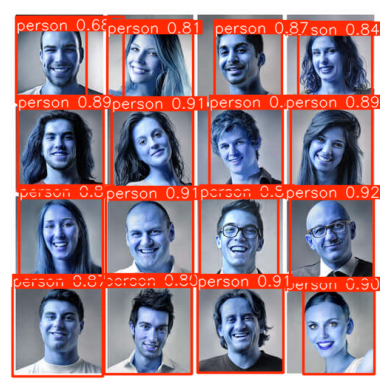

In [36]:

plt.imshow(results[0].plot())  # Mostra imagem com bounding boxes e rótulos
plt.axis("off")
plt.show()

